In [36]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.models import Model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa

import random

import pandas as pd

import glob
import os


import pickle


import Utils
import importlib
importlib.reload(Utils)
from Utils import DataGenerator,NNManager,TimingCallback,Predictor
from timeit import default_timer as timer

# Cargamos el dataset con las 5900 huellas dactilares

In [2]:
# Cargamos el Dataset total

ruta  = 'dataset_590/'

x_real = np.load(ruta + 'img_real.npz')['data']
y_real = np.load(ruta + 'label_real.npy')
x_easy = np.load(ruta + 'img_easy.npz')['data']
y_easy = np.load(ruta + 'label_easy.npy')
x_medium = np.load(ruta + 'img_medium.npz')['data']
y_medium = np.load(ruta + 'label_medium.npy')
x_hard = np.load(ruta + 'img_hard.npz')['data']
y_hard = np.load(ruta + 'label_hard.npy')

print('REAL ',x_real.shape, y_real.shape)
print('Easy ',x_easy.shape, y_easy.shape)
print('Medium ',x_medium.shape, y_medium.shape)
print('Hard ',x_hard.shape, y_hard.shape)

x_data = np.concatenate([x_easy, x_medium, x_hard], axis=0)
label_data = np.concatenate([y_easy, y_medium, y_hard], axis=0)

REAL  (5900, 90, 90) (5900, 4)
Easy  (17632, 90, 90) (17632, 4)
Medium  (16776, 90, 90) (16776, 4)
Hard  (14025, 90, 90) (14025, 4)


# Creamos un NNManager sobre el set de datos

In [37]:
NNManager(x_real,y_real,x_data,label_data,managerName = 'Trained_NNManager', networkSize = 250)


NNManager:  Trained_NNManager
Tenemos huellas de  5900  individuos
Tenemos  70  redes entrenadas con sets de  250  huellas cada una
Cada huella se encuentra en  3  redes como mínimo
Iniciando distribuidor.


Realizando proceso de agitado. Número de sacudidas: 1225000 (tiempo: 0:00:13)100%||


# Cargamos el NNManager que acabamos de crear

In [45]:
nm = NNManager.getInstance(NNManager,'Trained_NNManager')

NNManager:  Trained_NNManager
Tenemos huellas de  5900  individuos
Tenemos  70  redes entrenadas con sets de  250  huellas cada una
Cada huella se encuentra en  3  redes como mínimo


# Tomamos de entre el set de datos una huella al azar

In [6]:
#Tomamos aleatoriamente una huella para probarla
random_idx = random.randint(0, len(x_real)-1)

#Obtenemos su imagen y su correspondiente etiqueta
random_img = x_real[random_idx]
random_label = y_real[random_idx]


# Comprobamos que la distribución de las redes se ha realizado

In [7]:
print('El usuario ', random_label,' está en las redes: ',nm.returnNetworks(str(random_label)))


El usuario  [540   1   1   0]  está en las redes:  [9, 9, 54]


# Intentamos identificar al usuario

Red neuronal no encontrada. Precisa entrenamiento
Red neuronal no encontrada. Precisa entrenamiento
Red neuronal no encontrada. Precisa entrenamiento

La predicción para el usuario  [540   1   1   0]  es: []
Tiempo de la predicción:  0.003109399999971174


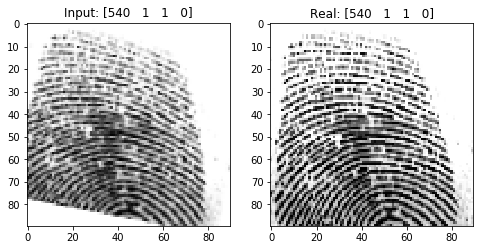

In [8]:
#Para la imagen que hemos obtenido vamos a aplicar un desenfoque
# para simular la lectura imperfecta desde un lector.
random_img_aug = Utils.dataAugmentationImg(random_img)
starttime = timer()
prediction = nm.matchFingerprint(str(random_label),random_img_aug)
tiempo = timer() - starttime
print('\nLa predicción para el usuario ', random_label, ' es:', prediction)

print('Tiempo de la predicción: ',tiempo)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Input: %s' %random_label)
plt.imshow(random_img_aug.squeeze(), cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Real: %s' %random_label)
plt.imshow(nm.returnFingerprint(str(random_label)).squeeze(), cmap='gray')

# Intentamos identificar a un usuario inexistente

In [9]:
#Para la imagen que hemos obtenido vamos a aplicar un desenfoque
# para simular la lectura imperfecta desde un lector.
starttime = timer()
prediction = nm.matchFingerprint("USUARIO_INVENT",random_img_aug)
tiempo = timer() - starttime
print('\nLa predicción para el usuario ', random_label, ' es:', prediction)

print('Tiempo de la predicción: ',tiempo)


El usuario  USUARIO_INVENT  no existe

La predicción para el usuario  [540   1   1   0]  es: []
Tiempo de la predicción:  0.000259599999992588


# Entrenamos sus redes y lo volvemos a probar

In [10]:
nm.trainNetworks_user(str(random_label))

Model_for_dataset_N_9  se va a entrenar
Model: "Model_for_dataset_N_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 90, 90, 1)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 90, 90, 1)]  0                                            
__________________________________________________________________________________________________
featureModel (Model)            (None, 22, 22, 32)   9568        input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
subtract (Subtract)             (None,

Epoch 10/15
57/57 [==============================] - 17s 298ms/step - loss: 0.2137 - acc: 0.9161 - val_loss: 0.0998 - val_acc: 0.9740
Epoch 11/15
57/57 [==============================] - 17s 294ms/step - loss: 0.2040 - acc: 0.9211 - val_loss: 0.2072 - val_acc: 0.9115
Epoch 12/15
57/57 [==============================] - 17s 297ms/step - loss: 0.2284 - acc: 0.9013 - val_loss: 0.2193 - val_acc: 0.9271
Epoch 13/15
57/57 [==============================] - 17s 293ms/step - loss: 0.2174 - acc: 0.9079 - val_loss: 0.1949 - val_acc: 0.9062
Epoch 14/15
57/57 [==============================] - 17s 299ms/step - loss: 0.1917 - acc: 0.9271 - val_loss: 0.2255 - val_acc: 0.9115
Epoch 15/15
57/57 [==============================] - 17s 293ms/step - loss: 0.1932 - acc: 0.9145 - val_loss: 0.2582 - val_acc: 0.8906
Model_for_dataset_N_54  se va a entrenar
Model: "Model_for_dataset_N_54"
__________________________________________________________________________________________________
Layer (type)            

Cargando modelo entrenado con el dataset:  10
Cargando modelo entrenado con el dataset:  16
Cargando modelo entrenado con el dataset:  27
La predicción para el usuario  [100   0   0   1]  es: [[0.9506372]] [[0.8543575]] [[0.836852]]


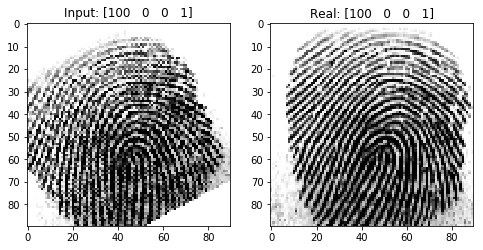

In [199]:
prediction = nm.matchFingerprint(str(random_label),random_img_aug)

print('La predicción para el usuario ', random_label, ' es:', *prediction)



plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Input: %s' %random_label)
plt.imshow(random_img_aug.squeeze(), cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Real: %s' %random_label)
plt.imshow(nm.returnFingerprint(str(random_label)).squeeze(), cmap='gray')

Ahora probaremos a identificarnos como este mismo usuario de nuevo pero con una huella dactilar de otro usuario diferente. 

Modelo entrenado con el dataset:  10 ya cargado
Modelo entrenado con el dataset:  16 ya cargado
Modelo entrenado con el dataset:  27 ya cargado
La predicción para el usuario  [100   0   0   1]  es de: [[0.00546905]] [[0.00778945]] [[0.00891272]]


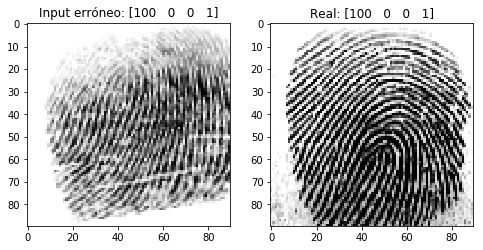

In [200]:
random_img_wrong = x_real[33]
random_img_wrong_aug = Utils.dataAugmentationImg(random_img_wrong)

prediction = nm.matchFingerprint(str(random_label),random_img_wrong_aug)

print('La predicción para el usuario ', random_label, ' es de:',*prediction)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Input erróneo: %s' %random_label)
plt.imshow(random_img_wrong_aug.squeeze(), cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Real: %s' %random_label)
plt.imshow(nm.returnFingerprint(str(random_label)).squeeze(), cmap='gray')

# Cargamos el dataset con las 100 huellas dactilares

In [201]:
# Cargamos el Dataset total

ruta  = 'dataset_10/'

x_real_10 = np.load(ruta + 'img_real.npz')['data']
y_real_10 = np.load(ruta + 'label_real.npy')
x_easy_10 = np.load(ruta + 'img_easy.npz')['data']
y_easy_10 = np.load(ruta + 'label_easy.npy')
x_medium_10 = np.load(ruta + 'img_medium.npz')['data']
y_medium_10 = np.load(ruta + 'label_medium.npy')
x_hard_10 = np.load(ruta + 'img_hard.npz')['data']
y_hard_10 = np.load(ruta + 'label_hard.npy')

print('REAL ',x_real_10.shape, y_real_10.shape)
print('Easy ',x_easy_10.shape, y_easy_10.shape)
print('Medium ',x_medium_10.shape, y_medium_10.shape)
print('Hard ',x_hard_10.shape, y_hard_10.shape)

x_data_10 = np.concatenate([x_easy_10, x_medium_10, x_hard_10], axis=0)
label_data_10 = np.concatenate([y_easy_10, y_medium_10, y_hard_10], axis=0)

REAL  (100, 90, 90) (100, 4)
Easy  (299, 90, 90) (299, 4)
Medium  (291, 90, 90) (291, 4)
Hard  (247, 90, 90) (247, 4)


# Creamos los datos de un nuevo individuo para añadirlo

In [202]:
def findDataUser(labels,imgs, label_user, labels_Usr = [],imgs_Usr = []):
    labels_Usr = []
    imgs_Usr = []
    for i in range(0,len(labels)):
        if labels[i][0] == label_user[0] and labels[i][1] == label_user[1] and labels[i][2] == label_user[2] and labels[i][3] == label_user[3]:
            labels_Usr.append(labels[i])
            imgs_Usr.append(imgs[i])
    return labels_Usr,imgs_Usr 

In [203]:
labelUsuario = y_real_10[0]
imgUsuario = x_real_10[0]

imgUsuario2 = x_real_10[:-1]

label_data_Usuario = []
x_data_Usuario = []

label_data_Usuario, x_data_Usuario = Utils.addUser(label_data_10,x_data_10,labelUsuario )
print('El usuario seleccionado es: ',str(labelUsuario))
print (' Hay ', len(label_data_Usuario), ' nuevas huellas')

El usuario seleccionado es:  [10  0  0  1]
 Hay  9  nuevas huellas


Revisamos el estado del NNManager antes de añadir al nuevo usuario

In [204]:
nm.printInfo()

NNManager:  Trained_NNManager
Tenemos huellas de  5900  individuos
Tenemos  70  redes entrenadas con sets de  250  huellas cada una
Cada huella se encuentra en  3  redes como mínimo


# Añadimos al nuevo usuario y entrenamos sus redes

In [205]:
nm.addUser(imgUsuario2 , labelUsuario, x_data_Usuario ,label_data_Usuario,train = True)

Model_for_dataset_N_70  se va a entrenar
Model: "Model_for_dataset_N_70"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 90, 90, 1)]  0                                            
__________________________________________________________________________________________________
input_20 (InputLayer)           [(None, 90, 90, 1)]  0                                            
__________________________________________________________________________________________________
featureModel (Model)            (None, 22, 22, 32)   9568        input_19[0][0]                   
                                                                 input_20[0][0]                   
__________________________________________________________________________________________________
subtract_6 (Subtract)           (Non

Revisamos el estado del NNManager después de añadir al nuevo usuario

In [206]:
nm.printInfo()

NNManager:  Trained_NNManager
Tenemos huellas de  5901  individuos
Tenemos  73  redes entrenadas con sets de  250  huellas cada una
Cada huella se encuentra en  3  redes como mínimo


# Intentamos identificar al usuario

Cargando modelo entrenado con el dataset:  70
Cargando modelo entrenado con el dataset:  71
Cargando modelo entrenado con el dataset:  72
La predicción para el usuario recién añadido   [10  0  0  1]  es de:  [[0.5626573]] [[0.71367174]] [[0.9823976]]


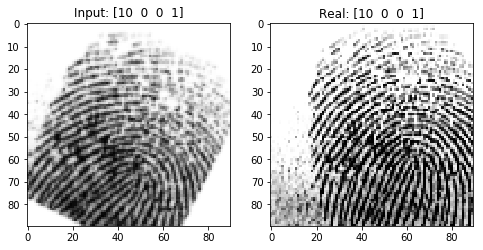

In [207]:
imgUsuario_aug = Utils.dataAugmentationImg(imgUsuario)
prediction = nm.matchFingerprint(str(labelUsuario),imgUsuario_aug)

print('La predicción para el usuario recién añadido  ', labelUsuario, ' es de: ',*prediction)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Input: %s' %labelUsuario)
plt.imshow(imgUsuario_aug.squeeze(), cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Real: %s' %labelUsuario)
plt.imshow(nm.returnFingerprint(str(labelUsuario)).squeeze(), cmap='gray')


In [208]:
#nm.trainNetworks()

# Tomamos un usuario cuyas redes están entrenadas

In [209]:
#Obtenemos su imagen y su correspondiente etiqueta
random_img = x_real[random_idx]
random_label = y_real[random_idx]

print ('Vamos a borrar al usuario: ',random_label,' que se encuentra en las redes: ', nm.returnNetworks(str(random_label)))

Vamos a borrar al usuario:  [100   0   0   1]  que se encuentra en las redes:  [10, 16, 27]


Cargando modelo entrenado con el dataset:  10
Cargando modelo entrenado con el dataset:  16
Cargando modelo entrenado con el dataset:  27
La predicción para el usuario  [100   0   0   1]  es de:  [[0.9852916]] [[0.99616987]] [[0.9980153]]


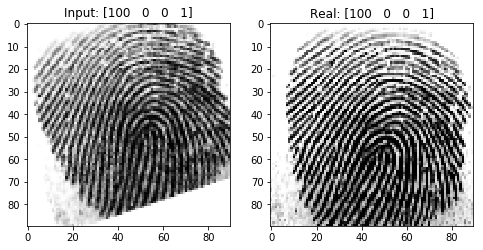

In [210]:
random_img_aug = Utils.dataAugmentationImg(random_img)
prediction = nm.matchFingerprint(str(random_label),random_img_aug)

print('La predicción para el usuario ', random_label, ' es de: ',*prediction)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Input: %s' %random_label)
plt.imshow(random_img_aug.squeeze(), cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Real: %s' %random_label)
plt.imshow(nm.returnFingerprint(str(random_label)).squeeze(), cmap='gray')

# Lo borramos

In [211]:
nm.deleteUser(random_label)

0  es el user_i
La red  10  ha sido borrada
Añadido el usuario  1677   la red  10
La red  16  ha sido borrada
Añadido el usuario  4742   la red  16
La red  27  ha sido borrada
Añadido el usuario  5601   la red  27
label_real [[100   0   0   1]] [[10  0  0  1]]
label_real tras cambios [[10  0  0  1]] [[10  0  0  1]]
[0] [10, 16, 27] [10  0  0  1] [5900] [0]


In [212]:
nm.printInfo()

NNManager:  Trained_NNManager
Tenemos huellas de  5900  individuos
Tenemos  73  redes entrenadas con sets de  250  huellas cada una
Cada huella se encuentra en  3  redes como mínimo


# Comprobamos que ya no existe

El usuario  [100   0   0   1]  no existe
La predicción para el usuario recién borrado   [100   0   0   1]  es de: 


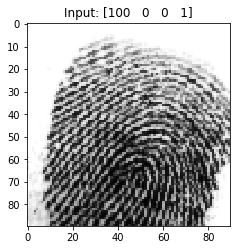

In [213]:
random_img_aug = Utils.dataAugmentationImg(random_img)
prediction = nm.matchFingerprint(str(random_label),random_img_aug)

print('La predicción para el usuario recién borrado  ', random_label, ' es de: ',*prediction)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Input: %s' %random_label)
plt.imshow(random_img_aug.squeeze(), cmap='gray')


# Entrenamos totalmente un Gestor

In [3]:
NNManager(x_real,y_real,x_data,label_data,managerName = 'Fully_Trained_NNManager', networkSize = 250)

NNManager:  Fully_Trained_NNManager
Tenemos huellas de  5900  individuos
Tenemos  70  redes entrenadas con sets de  250  huellas cada una
Cada huella se encuentra en  3  redes como mínimo
Iniciando distribuidor


Realizando proceso de agitado. Número de sacudidas: 1225000 (tiempo: 0:00:08)100%||


In [4]:
nm2 = NNManager.getInstance(NNManager,'Fully_Trained_NNManager')

NNManager:  Fully_Trained_NNManager
Tenemos huellas de  5900  individuos
Tenemos  70  redes entrenadas con sets de  250  huellas cada una
Cada huella se encuentra en  3  redes como mínimo


In [5]:
nm2.trainNetworks()

Model: "Model_for_dataset_N_0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 90, 90, 1)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 90, 90, 1)]  0                                            
__________________________________________________________________________________________________
featureModel (Model)            (None, 22, 22, 32)   9568        input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
subtract (Subtract)             (None, 22, 22, 32)   0           featureModel[

57/57 [==============================] - 15s 256ms/step - loss: 0.3007 - acc: 0.8723 - val_loss: 0.3284 - val_acc: 0.8490
Epoch 5/15
57/57 [==============================] - 14s 254ms/step - loss: 0.2744 - acc: 0.8810 - val_loss: 0.2628 - val_acc: 0.8698
Epoch 6/15
57/57 [==============================] - 14s 253ms/step - loss: 0.3011 - acc: 0.8739 - val_loss: 0.3766 - val_acc: 0.8490
Epoch 7/15
57/57 [==============================] - 14s 253ms/step - loss: 0.2547 - acc: 0.8893 - val_loss: 0.2298 - val_acc: 0.8958
Epoch 8/15
57/57 [==============================] - 14s 252ms/step - loss: 0.2438 - acc: 0.8931 - val_loss: 0.2078 - val_acc: 0.9219
Epoch 9/15
57/57 [==============================] - 15s 264ms/step - loss: 0.2139 - acc: 0.9112 - val_loss: 0.2088 - val_acc: 0.9115
Epoch 10/15
57/57 [==============================] - 15s 258ms/step - loss: 0.2049 - acc: 0.9123 - val_loss: 0.1504 - val_acc: 0.9323
Epoch 11/15
57/57 [==============================] - 15s 258ms/step - loss: 0.2

57/57 [==============================] - 15s 267ms/step - loss: 0.5167 - acc: 0.7319 - val_loss: 0.2985 - val_acc: 0.8698
Epoch 2/15
57/57 [==============================] - 15s 255ms/step - loss: 0.3333 - acc: 0.8531 - val_loss: 0.2952 - val_acc: 0.8750
Epoch 3/15
57/57 [==============================] - 14s 248ms/step - loss: 0.2967 - acc: 0.8734 - val_loss: 0.2784 - val_acc: 0.8750
Epoch 4/15
57/57 [==============================] - 14s 251ms/step - loss: 0.3061 - acc: 0.8640 - val_loss: 0.2271 - val_acc: 0.9115
Epoch 5/15
57/57 [==============================] - 15s 259ms/step - loss: 0.2601 - acc: 0.8898 - val_loss: 0.2318 - val_acc: 0.9167
Epoch 6/15
57/57 [==============================] - 14s 250ms/step - loss: 0.2431 - acc: 0.8964 - val_loss: 0.2493 - val_acc: 0.9062
Epoch 7/15
57/57 [==============================] - 15s 270ms/step - loss: 0.2456 - acc: 0.8925 - val_loss: 0.1638 - val_acc: 0.9167
Epoch 8/15
57/57 [==============================] - 15s 259ms/step - loss: 0.224

58/58 [==============================] - 16s 274ms/step - loss: 0.5793 - acc: 0.6654 - val_loss: 0.4359 - val_acc: 0.7865
Epoch 2/15
58/58 [==============================] - 15s 252ms/step - loss: 0.3822 - acc: 0.8346 - val_loss: 0.3117 - val_acc: 0.8750
Epoch 3/15
58/58 [==============================] - 15s 257ms/step - loss: 0.3099 - acc: 0.8669 - val_loss: 0.2590 - val_acc: 0.8958
Epoch 4/15
58/58 [==============================] - 14s 248ms/step - loss: 0.2852 - acc: 0.8761 - val_loss: 0.2428 - val_acc: 0.9115
Epoch 5/15
58/58 [==============================] - 14s 249ms/step - loss: 0.2469 - acc: 0.8998 - val_loss: 0.1713 - val_acc: 0.9531
Epoch 6/15
58/58 [==============================] - 15s 251ms/step - loss: 0.2595 - acc: 0.8885 - val_loss: 0.2819 - val_acc: 0.8854
Epoch 7/15
58/58 [==============================] - 15s 252ms/step - loss: 0.2282 - acc: 0.9116 - val_loss: 0.2284 - val_acc: 0.9115
Epoch 8/15
58/58 [==============================] - 16s 277ms/step - loss: 0.235

57/57 [==============================] - 14s 245ms/step - loss: 0.5682 - acc: 0.7149 - val_loss: 0.3467 - val_acc: 0.8438
Epoch 2/15
57/57 [==============================] - 14s 244ms/step - loss: 0.3752 - acc: 0.8262 - val_loss: 0.4402 - val_acc: 0.8281
Epoch 3/15
57/57 [==============================] - 14s 244ms/step - loss: 0.3328 - acc: 0.8520 - val_loss: 0.2876 - val_acc: 0.8698
Epoch 4/15
57/57 [==============================] - 14s 244ms/step - loss: 0.2921 - acc: 0.8783 - val_loss: 0.2601 - val_acc: 0.8906
Epoch 5/15
57/57 [==============================] - 14s 245ms/step - loss: 0.2811 - acc: 0.8821 - val_loss: 0.3309 - val_acc: 0.8542
Epoch 6/15
57/57 [==============================] - 14s 244ms/step - loss: 0.2430 - acc: 0.8914 - val_loss: 0.2458 - val_acc: 0.9219
Epoch 7/15
57/57 [==============================] - 14s 244ms/step - loss: 0.2067 - acc: 0.9139 - val_loss: 0.2247 - val_acc: 0.8750
Epoch 8/15
57/57 [==============================] - 14s 245ms/step - loss: 0.217

58/58 [==============================] - 14s 247ms/step - loss: 0.5679 - acc: 0.6762 - val_loss: 0.3447 - val_acc: 0.8698
Epoch 2/15
58/58 [==============================] - 14s 246ms/step - loss: 0.3227 - acc: 0.8605 - val_loss: 0.2749 - val_acc: 0.8802
Epoch 3/15
58/58 [==============================] - 14s 247ms/step - loss: 0.3321 - acc: 0.8610 - val_loss: 0.2788 - val_acc: 0.8698
Epoch 4/15
58/58 [==============================] - 15s 255ms/step - loss: 0.2925 - acc: 0.8798 - val_loss: 0.2647 - val_acc: 0.8854
Epoch 5/15
58/58 [==============================] - 14s 249ms/step - loss: 0.2789 - acc: 0.8831 - val_loss: 0.2431 - val_acc: 0.8854
Epoch 6/15
58/58 [==============================] - 14s 248ms/step - loss: 0.2508 - acc: 0.8928 - val_loss: 0.2680 - val_acc: 0.8854
Epoch 7/15
58/58 [==============================] - 14s 247ms/step - loss: 0.2456 - acc: 0.9041 - val_loss: 0.2077 - val_acc: 0.9062
Epoch 8/15
58/58 [==============================] - 15s 254ms/step - loss: 0.245

57/57 [==============================] - 14s 250ms/step - loss: 0.5513 - acc: 0.6891 - val_loss: 0.4113 - val_acc: 0.8438
Epoch 2/15
57/57 [==============================] - 14s 250ms/step - loss: 0.3470 - acc: 0.8509 - val_loss: 0.2853 - val_acc: 0.8802
Epoch 3/15
57/57 [==============================] - 14s 247ms/step - loss: 0.3039 - acc: 0.8657 - val_loss: 0.2597 - val_acc: 0.8854
Epoch 4/15
57/57 [==============================] - 14s 247ms/step - loss: 0.2832 - acc: 0.8832 - val_loss: 0.2116 - val_acc: 0.8958
Epoch 5/15
57/57 [==============================] - 15s 255ms/step - loss: 0.2485 - acc: 0.8925 - val_loss: 0.1956 - val_acc: 0.9271
Epoch 6/15
57/57 [==============================] - 14s 252ms/step - loss: 0.2395 - acc: 0.8997 - val_loss: 0.2268 - val_acc: 0.9010
Epoch 7/15
57/57 [==============================] - 14s 252ms/step - loss: 0.2333 - acc: 0.9057 - val_loss: 0.2555 - val_acc: 0.9010
Epoch 8/15
57/57 [==============================] - 14s 248ms/step - loss: 0.203

57/57 [==============================] - 15s 260ms/step - loss: 0.5201 - acc: 0.7138 - val_loss: 0.3721 - val_acc: 0.8750
Epoch 2/15
57/57 [==============================] - 17s 290ms/step - loss: 0.3301 - acc: 0.8553 - val_loss: 0.3755 - val_acc: 0.8646
Epoch 3/15
57/57 [==============================] - 18s 308ms/step - loss: 0.3123 - acc: 0.8701 - val_loss: 0.3026 - val_acc: 0.8698
Epoch 4/15
57/57 [==============================] - 14s 253ms/step - loss: 0.3601 - acc: 0.8470 - val_loss: 0.2614 - val_acc: 0.8802
Epoch 5/15
57/57 [==============================] - 14s 254ms/step - loss: 0.2627 - acc: 0.8909 - val_loss: 0.2240 - val_acc: 0.9010
Epoch 6/15
57/57 [==============================] - 14s 251ms/step - loss: 0.2556 - acc: 0.8942 - val_loss: 0.2311 - val_acc: 0.9219
Epoch 7/15
57/57 [==============================] - 15s 254ms/step - loss: 0.2510 - acc: 0.8986 - val_loss: 0.2351 - val_acc: 0.9010
Epoch 8/15
57/57 [==============================] - 15s 264ms/step - loss: 0.232

58/58 [==============================] - 15s 262ms/step - loss: 0.6062 - acc: 0.6503 - val_loss: 0.4857 - val_acc: 0.7865
Epoch 2/15
58/58 [==============================] - 15s 264ms/step - loss: 0.3871 - acc: 0.8341 - val_loss: 0.3327 - val_acc: 0.8750
Epoch 3/15
58/58 [==============================] - 16s 281ms/step - loss: 0.3251 - acc: 0.8594 - val_loss: 0.4402 - val_acc: 0.8021
Epoch 4/15
58/58 [==============================] - 16s 280ms/step - loss: 0.3009 - acc: 0.8658 - val_loss: 0.2076 - val_acc: 0.9375
Epoch 5/15
58/58 [==============================] - 15s 261ms/step - loss: 0.2505 - acc: 0.8933 - val_loss: 0.2151 - val_acc: 0.9115
Epoch 6/15
58/58 [==============================] - 15s 255ms/step - loss: 0.2448 - acc: 0.9003 - val_loss: 0.2179 - val_acc: 0.9219
Epoch 7/15
58/58 [==============================] - 14s 249ms/step - loss: 0.2613 - acc: 0.8804 - val_loss: 0.3535 - val_acc: 0.8906
Epoch 8/15
58/58 [==============================] - 15s 255ms/step - loss: 0.241

57/57 [==============================] - 15s 259ms/step - loss: 0.5596 - acc: 0.7007 - val_loss: 0.5797 - val_acc: 0.7344
Epoch 2/15
57/57 [==============================] - 15s 257ms/step - loss: 0.3761 - acc: 0.8262 - val_loss: 0.4013 - val_acc: 0.8229
Epoch 3/15
57/57 [==============================] - 14s 252ms/step - loss: 0.3297 - acc: 0.8569 - val_loss: 0.2866 - val_acc: 0.8542
Epoch 4/15
57/57 [==============================] - 15s 262ms/step - loss: 0.2803 - acc: 0.8750 - val_loss: 0.3833 - val_acc: 0.8073
Epoch 5/15
57/57 [==============================] - 15s 259ms/step - loss: 0.3187 - acc: 0.8536 - val_loss: 0.2763 - val_acc: 0.9010
Epoch 6/15
57/57 [==============================] - 15s 265ms/step - loss: 0.2545 - acc: 0.8914 - val_loss: 0.2553 - val_acc: 0.8854
Epoch 7/15
57/57 [==============================] - 14s 253ms/step - loss: 0.2427 - acc: 0.8958 - val_loss: 0.2077 - val_acc: 0.9115
Epoch 8/15
57/57 [==============================] - 15s 254ms/step - loss: 0.230

Epoch 1/15
57/57 [==============================] - 15s 258ms/step - loss: 0.5538 - acc: 0.6689 - val_loss: 0.4298 - val_acc: 0.8073
Epoch 2/15
57/57 [==============================] - 15s 259ms/step - loss: 0.3549 - acc: 0.8344 - val_loss: 0.3262 - val_acc: 0.8490
Epoch 3/15
57/57 [==============================] - 15s 263ms/step - loss: 0.2959 - acc: 0.8728 - val_loss: 0.2960 - val_acc: 0.8750
Epoch 4/15
57/57 [==============================] - 14s 254ms/step - loss: 0.2834 - acc: 0.8799 - val_loss: 0.2785 - val_acc: 0.9167
Epoch 5/15
57/57 [==============================] - 14s 254ms/step - loss: 0.2745 - acc: 0.8777 - val_loss: 0.2539 - val_acc: 0.8906
Epoch 6/15
57/57 [==============================] - 14s 249ms/step - loss: 0.2447 - acc: 0.8942 - val_loss: 0.2288 - val_acc: 0.9115
Epoch 7/15
57/57 [==============================] - 14s 253ms/step - loss: 0.2378 - acc: 0.8942 - val_loss: 0.2393 - val_acc: 0.8802
Epoch 8/15
57/57 [==============================] - 14s 252ms/step - 

57/57 [==============================] - 17s 300ms/step - loss: 0.5743 - acc: 0.6820 - val_loss: 0.4251 - val_acc: 0.8281
Epoch 2/15
57/57 [==============================] - 18s 318ms/step - loss: 0.4053 - acc: 0.8076 - val_loss: 0.2947 - val_acc: 0.8906
Epoch 3/15
57/57 [==============================] - 18s 323ms/step - loss: 0.3437 - acc: 0.8454 - val_loss: 0.3234 - val_acc: 0.8281
Epoch 4/15
57/57 [==============================] - 16s 278ms/step - loss: 0.3097 - acc: 0.8651 - val_loss: 0.2593 - val_acc: 0.8750
Epoch 5/15
57/57 [==============================] - 16s 275ms/step - loss: 0.2854 - acc: 0.8734 - val_loss: 0.2831 - val_acc: 0.8750
Epoch 6/15
57/57 [==============================] - 16s 274ms/step - loss: 0.2430 - acc: 0.9035 - val_loss: 0.3156 - val_acc: 0.8698
Epoch 7/15
57/57 [==============================] - 15s 270ms/step - loss: 0.3038 - acc: 0.8766 - val_loss: 0.2334 - val_acc: 0.9010
Epoch 8/15
57/57 [==============================] - 16s 285ms/step - loss: 0.223

58/58 [==============================] - 15s 254ms/step - loss: 0.5992 - acc: 0.6379 - val_loss: 0.4081 - val_acc: 0.8385
Epoch 2/15
58/58 [==============================] - 15s 251ms/step - loss: 0.3688 - acc: 0.8394 - val_loss: 0.3258 - val_acc: 0.8594
Epoch 3/15
58/58 [==============================] - 15s 251ms/step - loss: 0.3248 - acc: 0.8621 - val_loss: 0.2923 - val_acc: 0.8750
Epoch 4/15
58/58 [==============================] - 15s 255ms/step - loss: 0.2709 - acc: 0.8852 - val_loss: 0.3017 - val_acc: 0.8438
Epoch 5/15
58/58 [==============================] - 15s 258ms/step - loss: 0.2955 - acc: 0.8788 - val_loss: 0.2572 - val_acc: 0.8854
Epoch 6/15
58/58 [==============================] - 15s 256ms/step - loss: 0.2411 - acc: 0.9030 - val_loss: 0.2813 - val_acc: 0.8906
Epoch 7/15
58/58 [==============================] - 15s 251ms/step - loss: 0.2612 - acc: 0.8912 - val_loss: 0.1930 - val_acc: 0.9427
Epoch 8/15
58/58 [==============================] - 15s 252ms/step - loss: 0.211

57/57 [==============================] - 14s 252ms/step - loss: 0.5546 - acc: 0.6793 - val_loss: 0.3242 - val_acc: 0.8698
Epoch 2/15
57/57 [==============================] - 14s 251ms/step - loss: 0.4320 - acc: 0.8076 - val_loss: 0.3291 - val_acc: 0.8333
Epoch 3/15
57/57 [==============================] - 14s 249ms/step - loss: 0.3523 - acc: 0.8405 - val_loss: 0.2627 - val_acc: 0.8854
Epoch 4/15
57/57 [==============================] - 14s 249ms/step - loss: 0.2723 - acc: 0.8849 - val_loss: 0.2573 - val_acc: 0.8802
Epoch 5/15
57/57 [==============================] - 14s 250ms/step - loss: 0.2895 - acc: 0.8750 - val_loss: 0.2434 - val_acc: 0.9010
Epoch 6/15
57/57 [==============================] - 14s 251ms/step - loss: 0.2908 - acc: 0.8788 - val_loss: 0.2813 - val_acc: 0.8854
Epoch 7/15
57/57 [==============================] - 14s 250ms/step - loss: 0.2262 - acc: 0.9062 - val_loss: 0.1484 - val_acc: 0.9479
Epoch 8/15
57/57 [==============================] - 14s 249ms/step - loss: 0.220

57/57 [==============================] - 14s 247ms/step - loss: 0.5503 - acc: 0.6623 - val_loss: 0.4739 - val_acc: 0.8021
Epoch 2/15
57/57 [==============================] - 14s 247ms/step - loss: 0.3602 - acc: 0.8388 - val_loss: 0.3735 - val_acc: 0.8385
Epoch 3/15
57/57 [==============================] - 14s 248ms/step - loss: 0.2952 - acc: 0.8745 - val_loss: 0.2633 - val_acc: 0.8802
Epoch 4/15
57/57 [==============================] - 14s 249ms/step - loss: 0.3008 - acc: 0.8629 - val_loss: 0.3117 - val_acc: 0.8542
Epoch 5/15
57/57 [==============================] - 14s 249ms/step - loss: 0.2688 - acc: 0.8876 - val_loss: 0.2148 - val_acc: 0.9115
Epoch 6/15
57/57 [==============================] - 14s 248ms/step - loss: 0.2519 - acc: 0.8914 - val_loss: 0.2916 - val_acc: 0.9010
Epoch 7/15
57/57 [==============================] - 14s 248ms/step - loss: 0.2661 - acc: 0.8936 - val_loss: 0.1972 - val_acc: 0.9271
Epoch 8/15
57/57 [==============================] - 14s 248ms/step - loss: 0.220

57/57 [==============================] - 14s 249ms/step - loss: 0.5181 - acc: 0.7248 - val_loss: 0.3365 - val_acc: 0.8594
Epoch 2/15
57/57 [==============================] - 14s 249ms/step - loss: 0.3807 - acc: 0.8235 - val_loss: 0.3457 - val_acc: 0.8542
Epoch 3/15
57/57 [==============================] - 15s 254ms/step - loss: 0.2957 - acc: 0.8684 - val_loss: 0.2012 - val_acc: 0.9062
Epoch 4/15
57/57 [==============================] - 14s 250ms/step - loss: 0.2922 - acc: 0.8690 - val_loss: 0.2425 - val_acc: 0.8854
Epoch 5/15
57/57 [==============================] - 15s 256ms/step - loss: 0.2745 - acc: 0.8799 - val_loss: 0.2228 - val_acc: 0.9167
Epoch 6/15
57/57 [==============================] - 14s 253ms/step - loss: 0.2860 - acc: 0.8799 - val_loss: 0.2404 - val_acc: 0.9167
Epoch 7/15
57/57 [==============================] - 14s 249ms/step - loss: 0.2561 - acc: 0.8953 - val_loss: 0.2048 - val_acc: 0.9062
Epoch 8/15
57/57 [==============================] - 14s 249ms/step - loss: 0.220

57/57 [==============================] - 14s 248ms/step - loss: 0.5412 - acc: 0.7023 - val_loss: 0.5023 - val_acc: 0.7865
Epoch 2/15
57/57 [==============================] - 14s 252ms/step - loss: 0.3669 - acc: 0.8322 - val_loss: 0.3837 - val_acc: 0.8281
Epoch 3/15
57/57 [==============================] - 14s 247ms/step - loss: 0.3337 - acc: 0.8602 - val_loss: 0.3097 - val_acc: 0.8542
Epoch 4/15
57/57 [==============================] - 14s 248ms/step - loss: 0.2834 - acc: 0.8843 - val_loss: 0.1849 - val_acc: 0.9375
Epoch 5/15
57/57 [==============================] - 14s 249ms/step - loss: 0.2701 - acc: 0.8794 - val_loss: 0.2302 - val_acc: 0.8906
Epoch 6/15
57/57 [==============================] - 14s 254ms/step - loss: 0.2250 - acc: 0.9084 - val_loss: 0.2916 - val_acc: 0.8750
Epoch 7/15
57/57 [==============================] - 14s 248ms/step - loss: 0.2469 - acc: 0.8986 - val_loss: 0.2682 - val_acc: 0.9010
Epoch 8/15
57/57 [==============================] - 14s 250ms/step - loss: 0.208

57/57 [==============================] - 14s 250ms/step - loss: 0.5597 - acc: 0.6650 - val_loss: 0.3832 - val_acc: 0.8646
Epoch 2/15
57/57 [==============================] - 14s 250ms/step - loss: 0.3597 - acc: 0.8394 - val_loss: 0.4028 - val_acc: 0.8125
Epoch 3/15
57/57 [==============================] - 14s 249ms/step - loss: 0.3205 - acc: 0.8635 - val_loss: 0.3295 - val_acc: 0.8646
Epoch 4/15
57/57 [==============================] - 14s 247ms/step - loss: 0.2946 - acc: 0.8766 - val_loss: 0.2095 - val_acc: 0.9115
Epoch 5/15
57/57 [==============================] - 14s 253ms/step - loss: 0.2652 - acc: 0.8931 - val_loss: 0.2133 - val_acc: 0.9219
Epoch 6/15
57/57 [==============================] - 14s 249ms/step - loss: 0.2472 - acc: 0.8997 - val_loss: 0.2165 - val_acc: 0.8958
Epoch 7/15
57/57 [==============================] - 14s 249ms/step - loss: 0.2804 - acc: 0.8860 - val_loss: 0.2123 - val_acc: 0.8802
Epoch 8/15
57/57 [==============================] - 14s 248ms/step - loss: 0.218

57/57 [==============================] - 14s 249ms/step - loss: 0.5224 - acc: 0.7259 - val_loss: 0.3772 - val_acc: 0.8542
Epoch 2/15
57/57 [==============================] - 14s 249ms/step - loss: 0.3675 - acc: 0.8279 - val_loss: 0.4121 - val_acc: 0.8021
Epoch 3/15
57/57 [==============================] - 14s 248ms/step - loss: 0.3263 - acc: 0.8536 - val_loss: 0.3461 - val_acc: 0.8646
Epoch 4/15
57/57 [==============================] - 14s 249ms/step - loss: 0.3114 - acc: 0.8635 - val_loss: 0.2647 - val_acc: 0.8854
Epoch 5/15
57/57 [==============================] - 14s 248ms/step - loss: 0.2767 - acc: 0.8777 - val_loss: 0.3199 - val_acc: 0.8646
Epoch 6/15
57/57 [==============================] - 14s 249ms/step - loss: 0.2888 - acc: 0.8734 - val_loss: 0.2584 - val_acc: 0.8802
Epoch 7/15
57/57 [==============================] - 14s 248ms/step - loss: 0.2482 - acc: 0.8925 - val_loss: 0.2872 - val_acc: 0.8594
Epoch 8/15
57/57 [==============================] - 14s 248ms/step - loss: 0.231

58/58 [==============================] - 14s 248ms/step - loss: 0.6167 - acc: 0.6185 - val_loss: 0.4819 - val_acc: 0.7656
Epoch 2/15
58/58 [==============================] - 14s 248ms/step - loss: 0.4325 - acc: 0.7958 - val_loss: 0.3350 - val_acc: 0.8698
Epoch 3/15
58/58 [==============================] - 14s 248ms/step - loss: 0.3651 - acc: 0.8421 - val_loss: 0.3331 - val_acc: 0.8646
Epoch 4/15
58/58 [==============================] - 14s 249ms/step - loss: 0.3002 - acc: 0.8718 - val_loss: 0.3125 - val_acc: 0.8490
Epoch 5/15
58/58 [==============================] - 15s 252ms/step - loss: 0.3000 - acc: 0.8696 - val_loss: 0.3128 - val_acc: 0.8542
Epoch 6/15
58/58 [==============================] - 15s 253ms/step - loss: 0.2597 - acc: 0.8922 - val_loss: 0.2314 - val_acc: 0.8854
Epoch 7/15
58/58 [==============================] - 14s 248ms/step - loss: 0.2796 - acc: 0.8820 - val_loss: 0.3215 - val_acc: 0.8281
Epoch 8/15
58/58 [==============================] - 14s 249ms/step - loss: 0.257

58/58 [==============================] - 15s 250ms/step - loss: 0.5083 - acc: 0.7376 - val_loss: 0.4147 - val_acc: 0.8281
Epoch 2/15
58/58 [==============================] - 14s 248ms/step - loss: 0.3305 - acc: 0.8518 - val_loss: 0.2978 - val_acc: 0.8750
Epoch 3/15
58/58 [==============================] - 14s 248ms/step - loss: 0.3424 - acc: 0.8551 - val_loss: 0.2570 - val_acc: 0.9010
Epoch 4/15
58/58 [==============================] - 14s 248ms/step - loss: 0.2741 - acc: 0.8777 - val_loss: 0.3137 - val_acc: 0.8802
Epoch 5/15
58/58 [==============================] - 15s 250ms/step - loss: 0.2374 - acc: 0.9019 - val_loss: 0.2462 - val_acc: 0.9010
Epoch 6/15
58/58 [==============================] - 14s 248ms/step - loss: 0.2431 - acc: 0.8933 - val_loss: 0.2245 - val_acc: 0.8958
Epoch 7/15
58/58 [==============================] - 14s 249ms/step - loss: 0.2257 - acc: 0.9019 - val_loss: 0.2252 - val_acc: 0.8906
Epoch 8/15
58/58 [==============================] - 14s 249ms/step - loss: 0.213

57/57 [==============================] - 14s 251ms/step - loss: 0.5428 - acc: 0.6924 - val_loss: 0.4338 - val_acc: 0.8125
Epoch 2/15
57/57 [==============================] - 14s 250ms/step - loss: 0.3856 - acc: 0.8284 - val_loss: 0.2835 - val_acc: 0.9010
Epoch 3/15
57/57 [==============================] - 14s 250ms/step - loss: 0.3377 - acc: 0.8547 - val_loss: 0.3133 - val_acc: 0.8333
Epoch 4/15
57/57 [==============================] - 14s 249ms/step - loss: 0.3099 - acc: 0.8629 - val_loss: 0.2745 - val_acc: 0.8906
Epoch 5/15
57/57 [==============================] - 14s 250ms/step - loss: 0.2846 - acc: 0.8821 - val_loss: 0.2934 - val_acc: 0.8854
Epoch 6/15
57/57 [==============================] - 14s 254ms/step - loss: 0.2560 - acc: 0.8893 - val_loss: 0.2932 - val_acc: 0.8750
Epoch 7/15
57/57 [==============================] - 14s 250ms/step - loss: 0.2507 - acc: 0.8942 - val_loss: 0.2692 - val_acc: 0.8854
Epoch 8/15
57/57 [==============================] - 14s 251ms/step - loss: 0.247

57/57 [==============================] - 14s 249ms/step - loss: 0.5505 - acc: 0.6749 - val_loss: 0.4276 - val_acc: 0.8073
Epoch 2/15
57/57 [==============================] - 14s 248ms/step - loss: 0.3894 - acc: 0.8273 - val_loss: 0.3795 - val_acc: 0.8385
Epoch 3/15
57/57 [==============================] - 14s 249ms/step - loss: 0.3383 - acc: 0.8394 - val_loss: 0.2575 - val_acc: 0.8958
Epoch 4/15
57/57 [==============================] - 14s 249ms/step - loss: 0.3311 - acc: 0.8635 - val_loss: 0.2145 - val_acc: 0.9271
Epoch 5/15
57/57 [==============================] - 14s 252ms/step - loss: 0.2821 - acc: 0.8794 - val_loss: 0.3430 - val_acc: 0.8438
Epoch 6/15
57/57 [==============================] - 14s 248ms/step - loss: 0.2577 - acc: 0.8865 - val_loss: 0.2710 - val_acc: 0.8698
Epoch 7/15
57/57 [==============================] - 14s 249ms/step - loss: 0.2371 - acc: 0.8991 - val_loss: 0.2501 - val_acc: 0.8854
Epoch 8/15
57/57 [==============================] - 14s 250ms/step - loss: 0.239

57/57 [==============================] - 14s 250ms/step - loss: 0.5385 - acc: 0.7220 - val_loss: 0.3421 - val_acc: 0.8438
Epoch 2/15
57/57 [==============================] - 14s 251ms/step - loss: 0.3692 - acc: 0.8289 - val_loss: 0.3305 - val_acc: 0.8281
Epoch 3/15
57/57 [==============================] - 14s 250ms/step - loss: 0.3300 - acc: 0.8520 - val_loss: 0.4143 - val_acc: 0.8385
Epoch 4/15
57/57 [==============================] - 14s 248ms/step - loss: 0.3399 - acc: 0.8498 - val_loss: 0.2783 - val_acc: 0.8854
Epoch 5/15
57/57 [==============================] - 14s 250ms/step - loss: 0.2912 - acc: 0.8723 - val_loss: 0.3992 - val_acc: 0.8125
Epoch 6/15
57/57 [==============================] - 15s 255ms/step - loss: 0.2653 - acc: 0.8942 - val_loss: 0.2960 - val_acc: 0.8698
Epoch 7/15
57/57 [==============================] - 14s 253ms/step - loss: 0.2397 - acc: 0.9013 - val_loss: 0.2083 - val_acc: 0.9062
Epoch 8/15
57/57 [==============================] - 14s 249ms/step - loss: 0.229

57/57 [==============================] - 14s 249ms/step - loss: 0.5501 - acc: 0.6919 - val_loss: 0.3044 - val_acc: 0.8906
Epoch 2/15
57/57 [==============================] - 14s 249ms/step - loss: 0.3678 - acc: 0.8344 - val_loss: 0.3175 - val_acc: 0.8646
Epoch 3/15
57/57 [==============================] - 14s 249ms/step - loss: 0.3350 - acc: 0.8547 - val_loss: 0.3150 - val_acc: 0.8958
Epoch 4/15
57/57 [==============================] - 14s 249ms/step - loss: 0.3079 - acc: 0.8624 - val_loss: 0.2095 - val_acc: 0.9323
Epoch 5/15
57/57 [==============================] - 14s 251ms/step - loss: 0.3172 - acc: 0.8695 - val_loss: 0.3035 - val_acc: 0.8490
Epoch 6/15
57/57 [==============================] - 14s 250ms/step - loss: 0.2631 - acc: 0.8904 - val_loss: 0.2374 - val_acc: 0.8854
Epoch 7/15
57/57 [==============================] - 14s 250ms/step - loss: 0.2631 - acc: 0.8914 - val_loss: 0.2628 - val_acc: 0.8906
Epoch 8/15
57/57 [==============================] - 14s 249ms/step - loss: 0.258

57/57 [==============================] - 14s 251ms/step - loss: 0.6086 - acc: 0.6250 - val_loss: 0.5130 - val_acc: 0.7396
Epoch 2/15
57/57 [==============================] - 14s 249ms/step - loss: 0.4320 - acc: 0.8070 - val_loss: 0.3434 - val_acc: 0.8594
Epoch 3/15
57/57 [==============================] - 14s 250ms/step - loss: 0.3219 - acc: 0.8629 - val_loss: 0.2813 - val_acc: 0.8854
Epoch 4/15
57/57 [==============================] - 14s 249ms/step - loss: 0.3019 - acc: 0.8794 - val_loss: 0.2273 - val_acc: 0.9062
Epoch 5/15
57/57 [==============================] - 14s 249ms/step - loss: 0.2951 - acc: 0.8745 - val_loss: 0.2483 - val_acc: 0.8750
Epoch 6/15
57/57 [==============================] - 14s 250ms/step - loss: 0.2725 - acc: 0.8816 - val_loss: 0.3080 - val_acc: 0.8646
Epoch 7/15
57/57 [==============================] - 14s 253ms/step - loss: 0.3042 - acc: 0.8772 - val_loss: 0.2532 - val_acc: 0.8958
Epoch 8/15
57/57 [==============================] - 14s 250ms/step - loss: 0.238

57/57 [==============================] - 14s 249ms/step - loss: 0.6209 - acc: 0.6409 - val_loss: 0.6005 - val_acc: 0.7240
Epoch 2/15
57/57 [==============================] - 14s 250ms/step - loss: 0.4334 - acc: 0.8087 - val_loss: 0.4036 - val_acc: 0.8281
Epoch 3/15
57/57 [==============================] - 14s 251ms/step - loss: 0.3620 - acc: 0.8448 - val_loss: 0.3665 - val_acc: 0.8125
Epoch 4/15
57/57 [==============================] - 14s 250ms/step - loss: 0.3258 - acc: 0.8525 - val_loss: 0.3296 - val_acc: 0.8594
Epoch 5/15
57/57 [==============================] - 14s 252ms/step - loss: 0.3156 - acc: 0.8679 - val_loss: 0.3240 - val_acc: 0.8594
Epoch 6/15
57/57 [==============================] - 14s 250ms/step - loss: 0.3034 - acc: 0.8591 - val_loss: 0.2261 - val_acc: 0.9167
Epoch 7/15
57/57 [==============================] - 14s 250ms/step - loss: 0.2695 - acc: 0.8876 - val_loss: 0.2506 - val_acc: 0.8906
Epoch 8/15
57/57 [==============================] - 14s 250ms/step - loss: 0.264

57/57 [==============================] - 14s 251ms/step - loss: 0.5094 - acc: 0.7341 - val_loss: 0.4150 - val_acc: 0.8177
Epoch 2/15
57/57 [==============================] - 14s 251ms/step - loss: 0.3583 - acc: 0.8388 - val_loss: 0.2576 - val_acc: 0.9062
Epoch 3/15
57/57 [==============================] - 14s 251ms/step - loss: 0.3693 - acc: 0.8235 - val_loss: 0.2865 - val_acc: 0.8802
Epoch 4/15
57/57 [==============================] - 14s 251ms/step - loss: 0.2913 - acc: 0.8783 - val_loss: 0.3300 - val_acc: 0.8229
Epoch 5/15
57/57 [==============================] - 14s 251ms/step - loss: 0.2688 - acc: 0.8821 - val_loss: 0.2901 - val_acc: 0.8438
Epoch 6/15
57/57 [==============================] - 14s 250ms/step - loss: 0.2912 - acc: 0.8712 - val_loss: 0.2473 - val_acc: 0.8958
Epoch 7/15
57/57 [==============================] - 14s 253ms/step - loss: 0.2591 - acc: 0.8904 - val_loss: 0.2978 - val_acc: 0.8802
Epoch 8/15
57/57 [==============================] - 14s 253ms/step - loss: 0.248

56/56 [==============================] - 14s 249ms/step - loss: 0.5369 - acc: 0.7087 - val_loss: 0.5478 - val_acc: 0.7656
Epoch 2/15
56/56 [==============================] - 14s 250ms/step - loss: 0.3907 - acc: 0.8270 - val_loss: 0.3432 - val_acc: 0.8438
Epoch 3/15
56/56 [==============================] - 14s 249ms/step - loss: 0.3061 - acc: 0.8778 - val_loss: 0.3318 - val_acc: 0.8438
Epoch 4/15
56/56 [==============================] - 14s 251ms/step - loss: 0.2472 - acc: 0.8956 - val_loss: 0.3252 - val_acc: 0.8594
Epoch 5/15
56/56 [==============================] - 14s 249ms/step - loss: 0.2514 - acc: 0.8996 - val_loss: 0.2467 - val_acc: 0.8854
Epoch 6/15
56/56 [==============================] - 14s 250ms/step - loss: 0.2224 - acc: 0.9001 - val_loss: 0.2438 - val_acc: 0.8854
Epoch 7/15
56/56 [==============================] - 14s 249ms/step - loss: 0.1941 - acc: 0.9202 - val_loss: 0.2299 - val_acc: 0.8958
Epoch 8/15
56/56 [==============================] - 14s 249ms/step - loss: 0.225

56/56 [==============================] - 14s 248ms/step - loss: 0.6089 - acc: 0.6395 - val_loss: 0.5934 - val_acc: 0.6719
Epoch 2/15
56/56 [==============================] - 14s 251ms/step - loss: 0.4086 - acc: 0.8181 - val_loss: 0.3866 - val_acc: 0.8125
Epoch 3/15
56/56 [==============================] - 14s 249ms/step - loss: 0.2940 - acc: 0.8705 - val_loss: 0.2828 - val_acc: 0.8802
Epoch 4/15
56/56 [==============================] - 14s 248ms/step - loss: 0.2620 - acc: 0.8823 - val_loss: 0.2481 - val_acc: 0.8802
Epoch 5/15
56/56 [==============================] - 14s 249ms/step - loss: 0.2712 - acc: 0.8800 - val_loss: 0.2426 - val_acc: 0.9010
Epoch 6/15
56/56 [==============================] - 14s 249ms/step - loss: 0.2291 - acc: 0.9079 - val_loss: 0.2499 - val_acc: 0.8802
Epoch 7/15
56/56 [==============================] - 14s 250ms/step - loss: 0.2155 - acc: 0.9118 - val_loss: 0.1782 - val_acc: 0.9271
Epoch 8/15
56/56 [==============================] - 14s 255ms/step - loss: 0.222

57/57 [==============================] - 14s 250ms/step - loss: 0.5565 - acc: 0.7001 - val_loss: 0.4100 - val_acc: 0.7969
Epoch 2/15
57/57 [==============================] - 14s 250ms/step - loss: 0.3629 - acc: 0.8481 - val_loss: 0.4766 - val_acc: 0.7917
Epoch 3/15
57/57 [==============================] - 14s 251ms/step - loss: 0.3267 - acc: 0.8547 - val_loss: 0.3543 - val_acc: 0.8333
Epoch 4/15
57/57 [==============================] - 14s 249ms/step - loss: 0.3258 - acc: 0.8640 - val_loss: 0.2765 - val_acc: 0.8906
Epoch 5/15
57/57 [==============================] - 14s 250ms/step - loss: 0.2969 - acc: 0.8734 - val_loss: 0.2678 - val_acc: 0.8854
Epoch 6/15
57/57 [==============================] - 14s 249ms/step - loss: 0.2525 - acc: 0.8969 - val_loss: 0.2585 - val_acc: 0.8802
Epoch 7/15
57/57 [==============================] - 14s 249ms/step - loss: 0.2539 - acc: 0.8986 - val_loss: 0.2518 - val_acc: 0.9010
Epoch 8/15
57/57 [==============================] - 14s 249ms/step - loss: 0.214

57/57 [==============================] - 14s 250ms/step - loss: 0.5986 - acc: 0.6519 - val_loss: 0.4035 - val_acc: 0.8594
Epoch 2/15
57/57 [==============================] - 14s 250ms/step - loss: 0.4176 - acc: 0.8109 - val_loss: 0.3510 - val_acc: 0.8490
Epoch 3/15
57/57 [==============================] - 15s 256ms/step - loss: 0.3291 - acc: 0.8613 - val_loss: 0.3689 - val_acc: 0.8281
Epoch 4/15
57/57 [==============================] - 14s 253ms/step - loss: 0.2947 - acc: 0.8755 - val_loss: 0.2890 - val_acc: 0.8750
Epoch 5/15
57/57 [==============================] - 14s 252ms/step - loss: 0.2621 - acc: 0.8865 - val_loss: 0.2361 - val_acc: 0.9010
Epoch 6/15
57/57 [==============================] - 14s 251ms/step - loss: 0.2636 - acc: 0.8876 - val_loss: 0.2819 - val_acc: 0.8802
Epoch 7/15
57/57 [==============================] - 15s 255ms/step - loss: 0.2280 - acc: 0.8986 - val_loss: 0.2346 - val_acc: 0.9219
Epoch 8/15
57/57 [==============================] - 14s 251ms/step - loss: 0.249

58/58 [==============================] - 15s 250ms/step - loss: 0.5609 - acc: 0.6913 - val_loss: 0.4223 - val_acc: 0.7865
Epoch 2/15
58/58 [==============================] - 14s 249ms/step - loss: 0.3706 - acc: 0.8384 - val_loss: 0.4096 - val_acc: 0.7708
Epoch 3/15
58/58 [==============================] - 14s 248ms/step - loss: 0.3122 - acc: 0.8626 - val_loss: 0.2710 - val_acc: 0.8854
Epoch 4/15
58/58 [==============================] - 14s 249ms/step - loss: 0.2945 - acc: 0.8669 - val_loss: 0.2197 - val_acc: 0.8854
Epoch 5/15
58/58 [==============================] - 14s 249ms/step - loss: 0.2605 - acc: 0.8982 - val_loss: 0.2468 - val_acc: 0.8958
Epoch 6/15
58/58 [==============================] - 15s 250ms/step - loss: 0.2408 - acc: 0.9009 - val_loss: 0.2401 - val_acc: 0.8958
Epoch 7/15
58/58 [==============================] - 14s 250ms/step - loss: 0.2662 - acc: 0.8836 - val_loss: 0.2856 - val_acc: 0.8750
Epoch 8/15
58/58 [==============================] - 14s 250ms/step - loss: 0.220

57/57 [==============================] - 14s 252ms/step - loss: 0.5237 - acc: 0.7220 - val_loss: 0.3571 - val_acc: 0.8438
Epoch 2/15
57/57 [==============================] - 14s 251ms/step - loss: 0.3262 - acc: 0.8618 - val_loss: 0.2784 - val_acc: 0.8698
Epoch 3/15
57/57 [==============================] - 14s 251ms/step - loss: 0.2841 - acc: 0.8788 - val_loss: 0.3672 - val_acc: 0.8333
Epoch 4/15
57/57 [==============================] - 14s 250ms/step - loss: 0.2787 - acc: 0.8788 - val_loss: 0.2387 - val_acc: 0.8854
Epoch 5/15
57/57 [==============================] - 14s 251ms/step - loss: 0.2519 - acc: 0.8925 - val_loss: 0.1925 - val_acc: 0.9167
Epoch 6/15
57/57 [==============================] - 14s 251ms/step - loss: 0.2575 - acc: 0.8920 - val_loss: 0.2645 - val_acc: 0.8854
Epoch 7/15
57/57 [==============================] - 14s 252ms/step - loss: 0.2091 - acc: 0.9161 - val_loss: 0.2527 - val_acc: 0.8802
Epoch 8/15
57/57 [==============================] - 14s 253ms/step - loss: 0.221

57/57 [==============================] - 14s 249ms/step - loss: 0.5342 - acc: 0.7220 - val_loss: 0.3373 - val_acc: 0.8646
Epoch 2/15
57/57 [==============================] - 14s 251ms/step - loss: 0.3563 - acc: 0.8410 - val_loss: 0.3052 - val_acc: 0.8750
Epoch 3/15
57/57 [==============================] - 14s 250ms/step - loss: 0.2969 - acc: 0.8739 - val_loss: 0.2917 - val_acc: 0.8750
Epoch 4/15
57/57 [==============================] - 14s 251ms/step - loss: 0.3041 - acc: 0.8668 - val_loss: 0.3650 - val_acc: 0.8333
Epoch 5/15
57/57 [==============================] - 14s 250ms/step - loss: 0.2692 - acc: 0.8860 - val_loss: 0.2355 - val_acc: 0.9062
Epoch 6/15
57/57 [==============================] - 14s 250ms/step - loss: 0.2568 - acc: 0.8876 - val_loss: 0.2735 - val_acc: 0.8646
Epoch 7/15
57/57 [==============================] - 14s 252ms/step - loss: 0.2613 - acc: 0.8909 - val_loss: 0.2222 - val_acc: 0.9062
Epoch 8/15
57/57 [==============================] - 14s 250ms/step - loss: 0.240